# Problem Set

Implement ***tabu search algorithm*** that accept an arbitrary list length and halting criteria to solve the following problem.

Let $\phi$ be a function defined in $[0, 2\pi] \rightarrow [0, 2\pi]$ as:


$$
\phi(\theta) =
    \begin{cases}
        2\theta & \text{if } 0 \leq \theta \leq \frac{\pi}{4} \\ \\
        \frac{3\pi}{10} + \frac{4\theta}{5} & \text{if } \frac{\pi}{4} \leq \theta \leq \frac{3\pi}{2} \\ \\
        \theta & \text{if } \frac{3\pi}{2} \leq \theta \leq 2\pi
    \end{cases}
$$

For each $\theta \in [0, 2\pi]$. Note that $\phi$ is bijective and that if we picture its domain as the set of angles a vector on $\mathbb{R}^2$ can have, then $\phi$ is such that


$$
0 \xrightarrow{\phi} 0, \\
\frac{\pi}{4} \xrightarrow{\phi} \frac{pi}{2}, \\
\frac{3\pi}{2} \xrightarrow{\phi} \frac{3\pi}{2}
$$

and the values between those angles fit so $\phi$ stay as a bijective function.


Let $\mathrm{ang}$ be a function, $\mathrm{ang}: \mathbb{R}^2 \rightarrow [0, 2\pi]$, that map a given vetor on $\mathbb{R}^2$
to an angle that goes from the segment that lays between $(1, 0)$ and $(0, 0)$ to the segment that lays between
$(0, 0)$ and $(x, y)$ that its expressed in radians $[0, 2\pi]$, in other words:

$$
\mathrm{ang}(x, y) =
    \begin{cases}
        0, & \text{if } x=0 \text{ and } y=0 \\
        \arctan(\frac{y}{x}), & \text{if } x > 0 \text{ and } y \geq 0 \\
        \frac{\pi}{2}, & \text{if } x = 0 \text{ and } y > 0 \\
        \pi + \arctan(\frac{y}{x}), & \text{if } x < 0 \text{ and } y \geq 0 \\
        \pi + \arctan(\frac{y}{x}), & \text{if } x < 0 \text{ and } y \leq 0 \\
        \frac{3\pi}{2}, & \text{if } x = 0 \text{ and } y < 0 \\
        2\pi + \arctan(\frac{y}{x}), & \text{if } x > 0 \text{ and } y \leq 0 \\
    \end{cases}
$$

For each $(x, y) \in \mathbb{R}^2$.

Lastly, lets define the objective function, $F: \mathbb{R}^2 \rightarrow \mathbb{R}$, as:

$$
F(x,y) =
    (x^2 + y^2)\cos(\phi(\mathrm{ang}(x, y))) ^2
    - 5(x^2 + y^2)\sin^2(\phi(\mathrm{ang}(x, y)))
    - \frac{1}{4} (x^2 + y^2)^{\frac{3}{2}} \sin^3(\phi(\mathrm{ang}(x, y)))
    + \frac{1}{16} (x^2 + y^2)^2 \sin^4(\phi(\mathrm{ang}(x, y)))
$$

$\forall \; (x, y) \in \mathbb{R}^2$, the search space defined as:

$$
S = \bigg\{
    (x, y) \in \mathbb{R}^2 :
    \exists i \; \in {0,...,150},
    x, y \in \Big\{
        \frac{i}{10}, \frac{i}{10\sqrt{2}}
    \Big\}
\bigg\}
$$

And, for each $(x, y) \in \mathbb{R}^2$, the type 1 neighbourhood defined as:

$$
V_1(x, y) = \Big\{
    (u, v) \in \mathbb{R}^2 : 
    |x-u| + |y-v| \leq 1
\Big\}
$$

And the type $\infty$ neighbourhood defined as:

$$
V_{\infty}(x, y) = \Big\{
    (u, v) \in \mathbb{R}^2 :
    \max \{
        |x - u|,
        |y - v|
    \} \leq 1
\Big\}
$$

In [6]:
"""Phi function implementation."""

# Imports
import numpy as np


def phi(theta):
    """Phi implementation."""
    if theta <= np.pi/4:
        return 2*theta
    if theta <= 3 * (np.pi / 2):
        return (3*np.pi/ 10) + (4 * theta/ 5)
    return theta

In [10]:
"""Ang function implementation."""

# Imports
import numpy as np


def ang(x, y):
    """Ang implementation."""
    if x == 0:
        if y == 0:
            return 0
        if y > 0:
            return np.pi / 2
        else:
            return 3 * np.pi/2
    if x > 0:
        if y >= 0:
            return np.arctan(y/x)
        else:
            return (2*np.pi) + np.arctan(y/x)
    else:
        return np.pi + np.arctan(y/x)

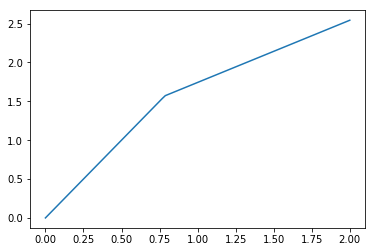

In [23]:
"""Plot Phi and Ang functions."""

# Imports
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

def plot_phi():
    X = np.linspace(0, 2, num=100)
    Y = [phi(x) for x in X]
    plt.figure()
    plt.plot(X, Y)
    plt.show()
    
plot_phi()